In [1]:
library(tidyverse) #Base package useful for most R aspects

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
tomato_api <- readRDS('tomato_api.Rda')
the_numbers_api <- readRDS('the_numbers_api.Rda')
combined_api_data <- rbind(tomato_api, the_numbers_api) 
combined_api_data %>% select(c(Title, Year, Runtime, Genre, Metascore, imdbRating, BoxOffice))

Title,Year,Runtime,Genre,Metascore,imdbRating,BoxOffice
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
All About Eve,1950,138 min,Drama,98,8.2,N/A
Sunset Boulevard,1991,8 min,Short,N/A,8.2,N/A
In a Lonely Place,1950,94 min,"Drama, Film-Noir, Mystery, Romance, Thriller",N/A,8.0,N/A
A Streetcar Named Desire,1951,122 min,Drama,96,8.0,N/A
Strangers on a Train,1951,101 min,"Crime, Film-Noir, Thriller",88,8.0,N/A
An American in Paris,1951,114 min,"Drama, Musical, Romance",84,7.2,N/A
The African Queen,1951,105 min,"Adventure, Drama, Romance, War",91,7.8,N/A
The Day the Earth Stood Still,2008,104 min,"Drama, Sci-Fi, Thriller",40,5.5,"$79,136,963"
High Noon,1952,85 min,"Drama, Thriller, Western",89,7.9,N/A


In [3]:
specific_api_data <- combined_api_data %>% 
    select(c(Title, Year, Runtime, Genre, Metascore, imdbRating, BoxOffice)) %>% 
    mutate(Runtime = as.numeric(gsub(" min", "", Runtime))) %>%
    mutate(BoxOffice = as.numeric(gsub("[^0-9.-]", "", BoxOffice))) %>% 
    mutate(Average_rating = (as.numeric(as.character(Metascore)) + (10 * as.numeric(as.character(imdbRating)))) / 2) %>%
    select(-c(Metascore, imdbRating)) %>%
    distinct(Title, .keep_all = TRUE)# %>%
#     filter(Average_rating >= 100)
specific_api_data

Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"Warning message:
"NAs introduced by coercion"

Title,Year,Runtime,Genre,BoxOffice,Average_rating
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
All About Eve,1950,138,Drama,NA,90.0
Sunset Boulevard,1991,8,Short,NA,NA
In a Lonely Place,1950,94,"Drama, Film-Noir, Mystery, Romance, Thriller",NA,NA
A Streetcar Named Desire,1951,122,Drama,NA,88.0
Strangers on a Train,1951,101,"Crime, Film-Noir, Thriller",NA,84.0
An American in Paris,1951,114,"Drama, Musical, Romance",NA,78.0
The African Queen,1951,105,"Adventure, Drama, Romance, War",NA,84.5
The Day the Earth Stood Still,2008,104,"Drama, Sci-Fi, Thriller",79136963,47.5
High Noon,1952,85,"Drama, Thriller, Western",NA,84.0


Warning message:
"Removed 3181 rows containing missing values (geom_point)."

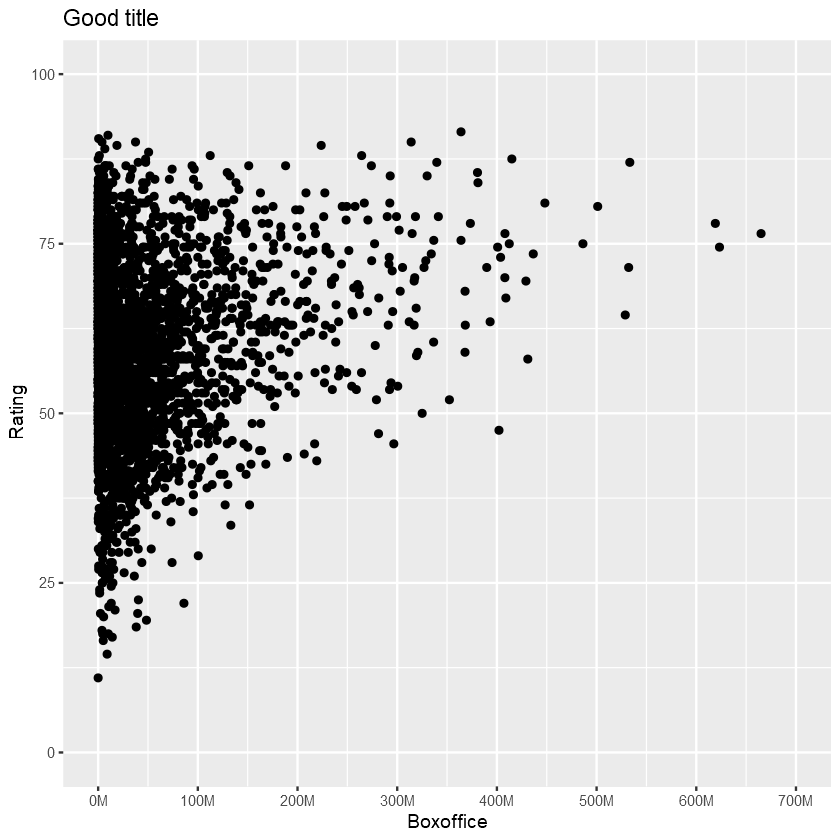

In [4]:
ylab <- c(0, 100, 200, 300, 400, 500, 600, 700)
specific_api_data %>% 
    ggplot(aes(x = BoxOffice, y = Average_rating)) +
    geom_point() +
    ggtitle("Good title") + 
    ylab("Rating") +
    xlab("Boxoffice") +
    ylim(0,100) +
    scale_x_continuous(limits = c(0, 700000000), 
                       labels = paste0(ylab, "M"),
                       breaks = 1000000 * ylab)